In [1]:
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

import matplotlib.pyplot as plt

import scipy.io as sio

In [2]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

# Part 1: Loading and Visualizing Data

In [3]:
data = sio.loadmat(file_name='ex6data1.mat')

In [4]:
X = data['X']
y = data['y']

In [5]:
negative = ( y == 0 ).flatten()
positive = ( y == 1 ).flatten()

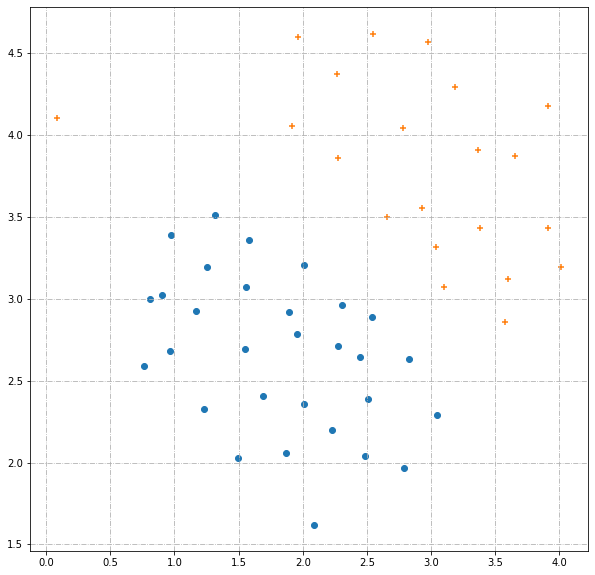

In [7]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(X[negative,0], X[negative,1], marker='o'  )
plt.scatter(X[positive,0], X[positive,1], marker='+'  )

plt.show()

# Part 2: Training Linear SVM

In [8]:
from sklearn import svm

In [9]:
model = svm.SVC(kernel='linear', C = 1)
model.fit(X, y.flatten())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [11]:
w = model.coef_[0]
a = -w[0]/ w[1]


In [12]:
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 15)

In [13]:
yy = a * xx -(model.intercept_[0])/w[1]

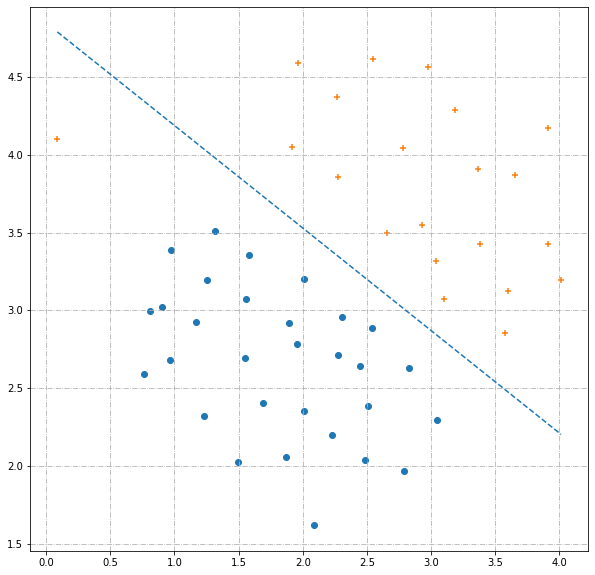

In [14]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(X[negative,0], X[negative,1], marker='o' , label='Not admitted' )
plt.scatter(X[positive,0], X[positive,1], marker='+' , label='Admitted' )
plt.plot(xx, yy, '--',  label='Boundary' )


plt.show()

In [15]:
model = svm.SVC(kernel='linear', C = 100)
model.fit(X, y.flatten())

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [16]:
w = model.coef_[0]
a = -w[0]/ w[1]

In [17]:
xx = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 15)

In [18]:
yy = a * xx -(model.intercept_[0])/w[1]

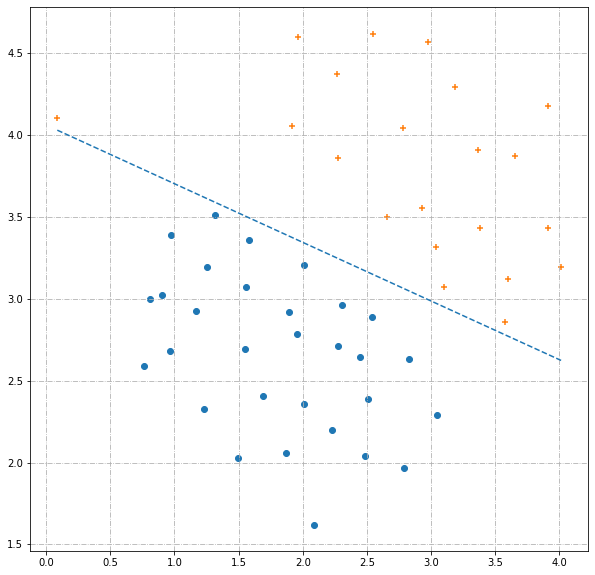

In [19]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(X[negative,0], X[negative,1], marker='o' , label='Not admitted' )
plt.scatter(X[positive,0], X[positive,1], marker='+' , label='Admitted' )
plt.plot(xx, yy, '--',  label='Boundary' )


plt.show()

# Part 3: Implementing Gaussian Kernel 

In [20]:
def gaussianKernel(x1, x2, sigma):
    
    sim = np.exp( - ( np.dot((x1-x2), (x1-x2)) ) / ( 2* sigma**2 )  );
    
    return sim

In [21]:
x1 = np.array([1, 2, 1])
x2 = np.array([0, 4, -1])
sigma = 2

In [22]:
sim = gaussianKernel(x1, x2, sigma)

In [23]:
print(f'Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {sigma } :')
print(f'\t{ sim }\n for sigma = 2, this value should be about 0.324652)')

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 :
	0.32465246735834974
 for sigma = 2, this value should be about 0.324652)


# Part 4: Visualizing Dataset 2

In [24]:
data = sio.loadmat(file_name='ex6data2.mat')

In [25]:
X = data['X']
y = data['y']

In [26]:
negative = ( y == 0 ).flatten()
positive = ( y == 1 ).flatten()

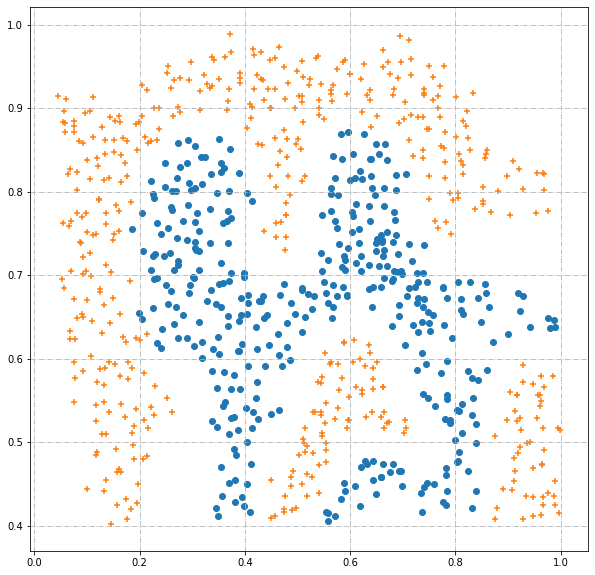

In [27]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(X[negative,0], X[negative,1], marker='o'  )
plt.scatter(X[positive,0], X[positive,1], marker='+'  )

plt.show()

# Part 5: Training SVM with RBF Kernel (Dataset 2)

In [28]:
def visualizeBoundary(X, y, model, varargin):
    
    negative = ( y == 0 ).flatten()
    positive = ( y == 1 ).flatten()

    x1plot = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 500)
    x2plot = np.linspace(np.min(X[:,1]), np.max(X[:,1]), 500)
    
    X1, X2 = np.meshgrid(x1plot, x2plot);
    
    z = model.predict(np.c_[X1.ravel(), X2.ravel()])
    z = z.reshape(X1.shape)
    
    fig, ax = plt.subplots( figsize=(10,10) )

    ax.grid(True, linestyle='-.')
    
    plt.pcolormesh(X1, X2 , z, cmap=plt.cm.Paired)
    plt.scatter(X[negative,0], X[negative,1], marker='o'  )
    plt.scatter(X[positive,0], X[positive,1], marker='+'  )
    plt.contour(x1plot, x2plot, z, (0,) )
    
    plt.show()

In [29]:
C = 1 
sigma = 0.1

In [30]:
model = svm.SVC(kernel='rbf', C = 100, gamma = (1/(2 * sigma**2 ) )     )
model.fit(X, y.flatten())

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/home/hemik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning:

No contour levels were found within the data range.



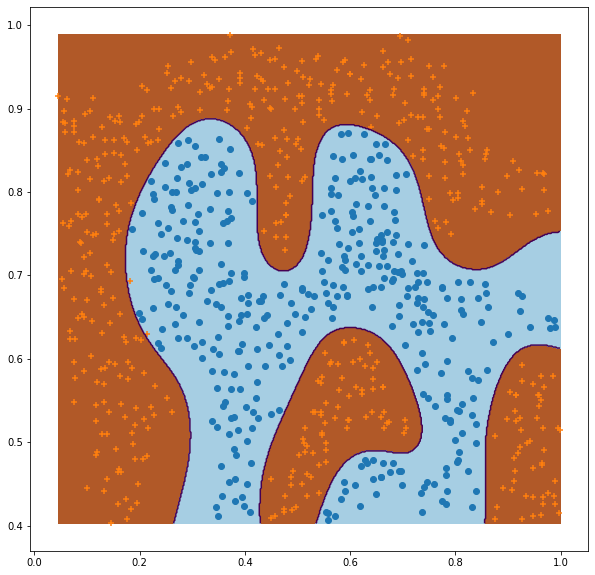

In [31]:
varargin= 1 
visualizeBoundary(X, y, model, varargin)

In [32]:
model2 = svm.SVC(kernel=gaussianKernel, C = 100, coef0= 1  )

# Part 6: Visualizing Dataset 3

In [33]:
data = sio.loadmat(file_name='ex6data3.mat')

In [34]:
X = data['X']
Xval = data['Xval']
y = data['y']
yval = data['yval']

In [35]:
negative = ( y == 0 ).flatten()
positive = ( y == 1 ).flatten()

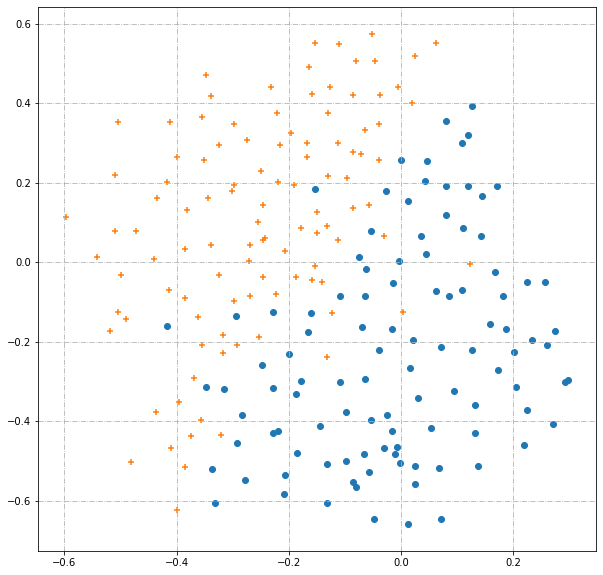

In [37]:
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(X[negative,0], X[negative,1], marker='o'  )
plt.scatter(X[positive,0], X[positive,1], marker='+'  )

plt.show()

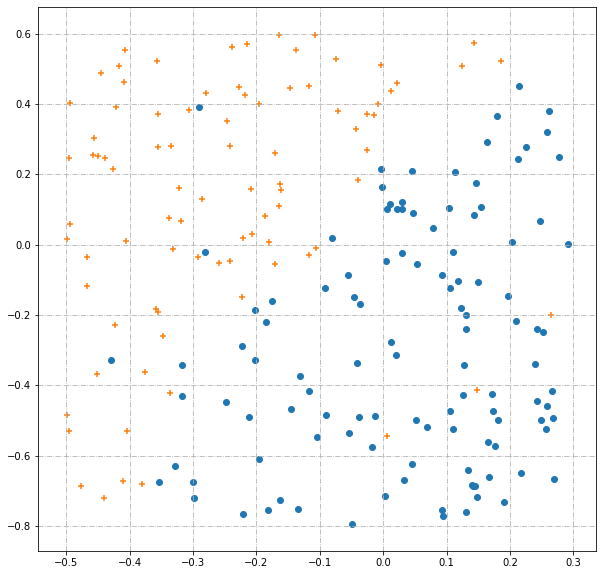

In [39]:
negativeval = ( yval == 0 ).flatten()
positiveval = ( yval == 1 ).flatten()
fig, ax = plt.subplots( figsize=(10,10) )

ax.grid(True, linestyle='-.')

plt.scatter(Xval[negativeval,0], Xval[negativeval,1], marker='o'  )
plt.scatter(Xval[positiveval,0], Xval[positiveval,1], marker='+'  )

plt.show()

# Part 7: Training SVM with RBF Kernel (Dataset 3)

In [40]:
def dataset3Params(X, y, Xval, yval):
    
    C = 1
    sigma = 0.1 
    
    multiplicator = np.array([ 0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30 ] )
    
    Errors = np.zeros( [np.shape(multiplicator)[0] ,np.shape(multiplicator)[0]  ]  )
    
    for i, C_buf in enumerate( C * multiplicator ):
        
        for j, sigma_buf in enumerate( sigma * multiplicator ):
            
            model = svm.SVC(kernel='rbf', C = C_buf, gamma = 1.0/(2 * sigma_buf**2 )  )
            
            model.fit(X, y.flatten())
            
            predictions = model.predict( Xval )
            Errors[i,j] = np.mean(predictions != yval.flatten() )
        
    j = np.argmin(Errors ) % np.shape(multiplicator)[0]
    i = int( np.argmin(Errors ) / np.shape(multiplicator)[0]   )
    
    return C * multiplicator[i], sigma * multiplicator[j]

In [41]:
C, sigma = dataset3Params(X, y, Xval, yval)

In [42]:
model = svm.SVC(kernel='rbf', C = C, gamma = (1/(2 * sigma**2 ) )    )
model.fit(X, y.flatten())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=49.99999999999999,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

/home/hemik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning:

No contour levels were found within the data range.



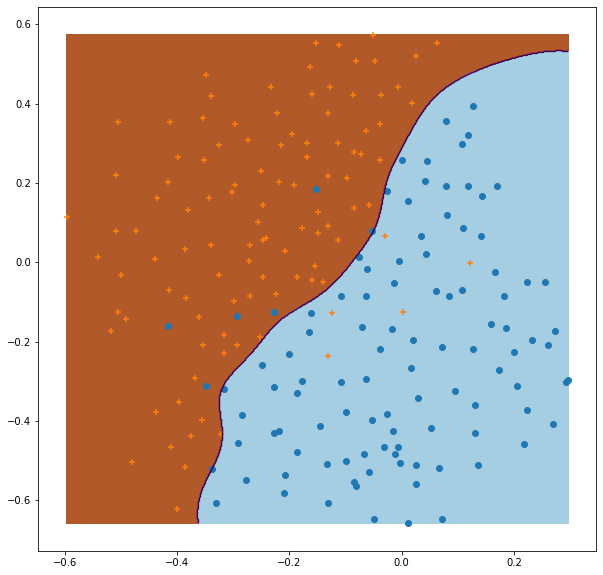

In [43]:
visualizeBoundary(X, y, model, varargin)